In [260]:
#!/usr/bin/env python
# coding: utf-8

import os
import sys
sys.path.append('./')
sys.path.append('../')

import torch
import torchvision
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

In [261]:
EPOCH = 100
BATCH_SIZE = 64
DEVICE = torch.device("cpu")

In [262]:
ROOT_DIR = '.' if os.path.exists('config') else '..' 
train_csv = os.path.join(ROOT_DIR, 'dataset', 'train_data_model_AJX75334501_target_Normal.csv')
test_csv = os.path.join(ROOT_DIR, 'dataset', 'train_data_model_AJX75334501_target_AbNormal.csv')

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [263]:
# df_combined = pd.concat([train_df, test_df], axis=0)

Receip_No
PalletID_Collect_Result
Production_Qty_Collect_Result

In [264]:
# train_df['Receip_No'].value_counts()

In [265]:
# test_df['Receip_No'].value_counts()

In [266]:
test_df = test_df[test_df['Receip_No'] != 'diff']

In [267]:
# train_df['PalletID_Collect_Result'].value_counts()

In [268]:
# test_df['PalletID_Collect_Result'].value_counts()

In [269]:
test_df['PalletID_Collect_Result'] = test_df['PalletID_Collect_Result'].replace('diff', 17)

In [270]:
# train_df['Production_Qty_Collect_Result'].value_counts()

In [271]:
# test_df['Production_Qty_Collect_Result'].value_counts()

In [272]:
test_df = test_df[test_df['Production_Qty_Collect_Result'] != 'diff']

In [273]:
train_df = train_df.drop(columns=['model_suffix'])
test_df = test_df.drop(columns=['model_suffix'])

In [274]:
train_df = train_df.drop(columns=['target'])
test_df = test_df.drop(columns=['target'])

In [275]:
train_df.head()

,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Stage1_Circle_Distance_Speed_Dam,Stage2_Circle_Distance_Speed_Dam,Stage3_Circle_Distance_Speed_Dam,WorkMode Collect Result,Chamber Temp. Collect Result_AutoClave,...,stage3_line24_distance_speed_Dam,average_thickness_Dam,1st_pressure_time_AutoClave,2nd_pressure_time_AutoClave,3rd_pressure_time_AutoClave,avg_pressure_time_AutoClave,time_ratio_Dam,time_ratio_Fill1,time_ratio_Fill2,time_ratio_AutoClave
0,85,16,124.00,130.85,300.0,5800,5300,5800,0.0,56,...,5800,-0.002333,75.915,0.490,60.258,45.554333,0.148,0.113,0.038,0.700
1,70,10,130.85,130.85,300.0,4000,5000,4000,1.0,54,...,4000,0.000000,72.059,36.300,60.500,56.286333,0.112,0.091,0.032,0.765
2,70,10,133.50,133.50,300.0,9000,9000,9000,1.0,47,...,9000,0.000000,72.480,36.240,59.760,56.160000,0.130,0.133,0.029,0.708
3,70,10,133.50,133.50,303.5,9000,9000,9000,1.0,54,...,9000,0.000000,75.840,60.120,60.120,65.360000,0.137,0.134,0.028,0.702
4,70,16,130.85,130.85,300.0,6500,6500,6500,0.0,54,...,6500,0.000000,75.915,0.493,60.258,45.555333,0.109,0.108,0.040,0.743


In [276]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['cleaned_workorder'] = label_encoder.fit_transform(train_df['cleaned_workorder'])

In [277]:
test_df['cleaned_workorder'] = label_encoder.fit_transform(test_df['cleaned_workorder'])

In [278]:
test_df['cure_end_position_XZ_Fill2'] = label_encoder.fit_transform(test_df['cure_end_position_XZ_Fill2'])
test_df['cure_start_position_XZ_Fill2'] = label_encoder.fit_transform(test_df['cure_start_position_XZ_Fill2'])
test_df['cure_standby_position_XZ_Fill2'] = label_encoder.fit_transform(test_df['cure_standby_position_XZ_Fill2'])
test_df['stage1_line13_distance_speed_Dam'] = label_encoder.fit_transform(test_df['stage1_line13_distance_speed_Dam'])
test_df['stage2_line13_distance_speed_Dam'] = label_encoder.fit_transform(test_df['stage2_line13_distance_speed_Dam'])
test_df['stage3_line13_distance_speed_Dam'] = label_encoder.fit_transform(test_df['stage3_line13_distance_speed_Dam'])


In [279]:
train_df['cure_end_position_XZ_Fill2'] = label_encoder.fit_transform(train_df['cure_end_position_XZ_Fill2'])
train_df['cure_start_position_XZ_Fill2'] = label_encoder.fit_transform(train_df['cure_start_position_XZ_Fill2'])
train_df['cure_standby_position_XZ_Fill2'] = label_encoder.fit_transform(train_df['cure_standby_position_XZ_Fill2'])
train_df['stage1_line13_distance_speed_Dam'] = label_encoder.fit_transform(train_df['stage1_line13_distance_speed_Dam'])
train_df['stage2_line13_distance_speed_Dam'] = label_encoder.fit_transform(train_df['stage2_line13_distance_speed_Dam'])
train_df['stage3_line13_distance_speed_Dam'] = label_encoder.fit_transform(train_df['stage3_line13_distance_speed_Dam'])

In [280]:
test_df['Receip_No'].value_counts()

Receip_No
1    1837
6       2
Name: count, dtype: int64

In [281]:
test_df['Receip_No'] = label_encoder.fit_transform(test_df['Receip_No'])
test_df['PalletID_Collect_Result'] = label_encoder.fit_transform(test_df['PalletID_Collect_Result'])
test_df['Production_Qty_Collect_Result'] = label_encoder.fit_transform(test_df['Production_Qty_Collect_Result'])

In [282]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31902 entries, 0 to 31901
Data columns (total 55 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CURE SPEED Collect Result_Dam                   31902 non-null  int64  
 1   DISCHARGED SPEED OF RESIN Collect Result_Dam    31902 non-null  int64  
 2   Head Clean Position Z Collect Result_Dam        31902 non-null  float64
 3   Head Purge Position Z Collect Result_Dam        31902 non-null  float64
 4   Head Zero Position Y Collect Result_Dam         31902 non-null  float64
 5   Stage1_Circle_Distance_Speed_Dam                31902 non-null  int64  
 6   Stage2_Circle_Distance_Speed_Dam                31902 non-null  int64  
 7   Stage3_Circle_Distance_Speed_Dam                31902 non-null  int64  
 8   WorkMode Collect Result                         31902 non-null  float64
 9   Chamber Temp. Collect Result_AutoClave 

In [283]:
train_df = train_df.to_numpy()
test_df = test_df.to_numpy()

trainset = torch.tensor(train_df, dtype=torch.float64)
testset = torch.tensor(test_df, dtype=torch.float64)

In [284]:
class MyDataset(Dataset):
    # 해당 클래스는 torch.utils.data.Dataset을 상속받습니다.
    def __init__(self, data, target):
        super().__init__()
        # 해당 클래스의 인스턴스를 초기화합니다.
        self.data = data
        self.target = target

    def __len__(self):
        # 해당 데이터셋의 총 데이터 수를 리턴합니다.
        return len(self.data)
    
    def __getitem__(self, idx):
        # 인덱스 idx에 해당하는 데이터를 가져옵니다.
        return self.data[idx], self.target[idx]
    

if __name__ == "__main__":
    # ROOT_DIR = '.' if os.path.exists('config') else '..' 
    # train_csv = os.path.join(ROOT_DIR, 'dataset', 'train_data_model_AJX75334501_target_Normal.csv')
    # test_csv = os.path.join(ROOT_DIR, 'dataset', 'train_data_model_AJX75334501_target_AbNormal.csv')
    
    # train_df = pd.read_csv(train_csv)
    # test_df = pd.read_csv(test_csv)

    # train_df = train_df.drop(columns=['ID'],axis=1)
    # test_df = test_df.drop(columns=['ID'],axis=1)

    # # random_list = [1]
    # # rand_iter = iter(random_list)
    # # RANDOM_STATE = next(rand_iter)

    trainset, validset = train_test_split(trainset, test_size=0.2, random_state=42)
    
    # train_df = train_df.drop(columns=['y','ID'],axis=1)
    # test_df = test_df.drop(columns=['ID'],axis=1)
    
    # X_train = X_train.to_numpy()
    # X_valid = X_valid.to_numpy()
    
    # trainset = torch.tensor(X_train, dtype=torch.float64)
    # validset = torch.tensor(X_valid, dtype=torch.float64)
    
    # train_data = trainset
    # valid_data = validset

    # train_dataset = MyDataset(train_data, train_target)
    # valid_dataset = MyDataset(valid_data, valid_target)

    train_Data = trainset[0]

    print(len(trainset))
    print(train_Data.shape)
    print(train_Data)

25521
torch.Size([55])
tensor([7.0000e+01, 1.0000e+01, 1.3085e+02, 1.3085e+02, 3.0000e+02, 4.0000e+03,
        9.0000e+03, 4.0000e+03, 1.0000e+00, 5.4000e+01, 1.0600e+01, 1.4500e+02,
        5.0000e+01, 8.5000e+01, 1.0000e+00, 1.8000e+02, 1.0000e+00, 6.0000e+00,
        1.4700e+02, 7.9061e+02, 2.0000e+00, 3.0000e+00, 3.0000e+00, 3.8950e+02,
        0.0000e+00, 0.0000e+00, 6.8140e+02, 5.6985e+01, 1.6726e-01, 3.7750e+02,
        3.0200e+02, 6.7950e+02, 3.1737e+01, 1.6660e+00, 3.1737e+01, 2.1713e+01,
        1.7307e+02, 1.2312e+01, 1.7307e+02, 1.1948e+02, 0.0000e+00, 4.0000e+03,
        7.0000e+00, 9.0000e+03, 0.0000e+00, 4.0000e+03, 0.0000e+00, 7.4710e+01,
        3.7631e+01, 6.0137e+01, 5.7493e+01, 1.0500e-01, 9.0000e-02, 3.2000e-02,
        7.7300e-01], dtype=torch.float64)


In [285]:
train_loader = DataLoader(
    dataset = trainset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 4
)

In [286]:
valid_loader = DataLoader(
    dataset = validset,
    batch_size = len(validset),
    shuffle = True,
    num_workers = 4
)

In [287]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(55,40),
            nn.BatchNorm1d(num_features=40),
            nn.ReLU(),
            nn.Linear(40,25),
            nn.BatchNorm1d(num_features=25),
            nn.ReLU(),
            nn.Linear(25,10),
            nn.BatchNorm1d(num_features=10),
            nn.ReLU(),
            nn.Linear(10,7),
        )
        self.decoder = nn.Sequential(
            nn.Linear(7,10),
            nn.BatchNorm1d(num_features=10),
            nn.ReLU(),
            nn.Linear(10,25),
            nn.BatchNorm1d(num_features=25),
            nn.ReLU(),
            nn.Linear(25,40),
            nn.BatchNorm1d(num_features=40),
            nn.ReLU(),
            nn.Linear(40,55),
        )
        
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return encoded, decoded

In [288]:
autoencoder = Autoencoder().to(DEVICE)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [294]:
def train(autoencoder, train_loader):
    autoencoder.train()
    losses = 0
    for batch_idx, features in enumerate(train_loader):
        # target = target.to(DEVICE)
        features = features.float()
        logits = autoencoder(features)
        # print(type(logits))
        # print(logits)
        loss = criterion(logits[1],features)
        losses = losses + loss
        # print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

In [299]:
def valid(autoencoder, valid_loader):
    autoencoder.eval()
    losses = 0
    for batch_idx, features in enumerate(valid_loader):
        # target = target.to(DEVICE)
        features = features.float()
        logits = autoencoder(features)
        loss = criterion(logits[1],features)
        losses = losses + loss
    return losses

In [300]:
train_losses = []
valid_losses = []

In [301]:
patience = 5  
best_val_loss = float('inf')  
patience_counter = 0  

In [302]:
for epoch in range(1,EPOCH+1):
    train_loss = train(autoencoder, train_loader)
    # print(f'train loss = {torch.sqrt(train_loss)}')
    train_losses.append(train_loss.item())
    valid_loss = valid(autoencoder, train_loader)
    # print(f'valid loss = {torch.sqrt(valid_loss)}')
    valid_losses.append(valid_loss.item())
    #Early stopping
    if valid_loss < best_val_loss:
        best_val_loss = valid_loss
        patience_counter = 0  # 검증 손실이 개선되었으므로 patience_counter 초기화
    else:
        patience_counter += 1  # 검증 손실이 개선되지 않으면 patience_counter 증가

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

Early stopping at epoch 77


In [303]:
valid_losses

[2751850752.0,
 2688215040.0,
 2608060672.0,
 2523793920.0,
 2412165888.0,
 2281644544.0,
 2144648448.0,
 2025769600.0,
 1881727360.0,
 1772142336.0,
 1614245632.0,
 1510317440.0,
 1359786752.0,
 1237114112.0,
 1126477056.0,
 997460992.0,
 882472064.0,
 822830208.0,
 683890048.0,
 637624768.0,
 543384896.0,
 505342240.0,
 434069728.0,
 384954464.0,
 355482048.0,
 319182368.0,
 289069856.0,
 276767200.0,
 249721584.0,
 234141696.0,
 214532016.0,
 191607408.0,
 170329088.0,
 151478736.0,
 132246328.0,
 107532456.0,
 88838216.0,
 84521416.0,
 67487120.0,
 54573756.0,
 52944220.0,
 44521676.0,
 37404400.0,
 38319392.0,
 35677768.0,
 29165840.0,
 28845700.0,
 25742046.0,
 22541816.0,
 18644886.0,
 20364942.0,
 13268800.0,
 10354370.0,
 8411349.0,
 6736762.5,
 4134621.75,
 4949547.0,
 4528580.0,
 4492570.5,
 2908664.25,
 3326232.25,
 1712867.625,
 2507603.5,
 2472929.0,
 1539239.125,
 2941651.25,
 1338193.0,
 1463371.0,
 1997575.0,
 1765716.125,
 977147.9375,
 1077405.75,
 1615403.0,
 174235

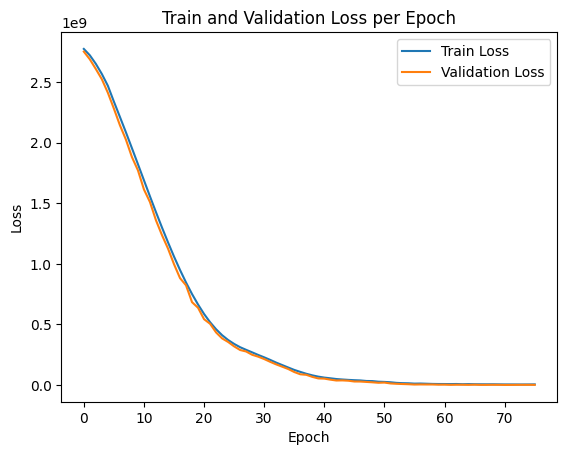

In [304]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss per Epoch')
plt.show()

In [305]:
def check_model_mode(model):
    if model.training:
        print("The model is in training mode.")
    else:
        print("The model is in evaluation mode.")

In [306]:
check_model_mode(autoencoder)

The model is in evaluation mode.


In [307]:
testset = testset.float()
result = autoencoder(testset)

In [308]:
loss_temp = nn.MSELoss()

In [309]:
for i in range(11):
    x0_output = torch.sqrt(loss_temp(testset[:,i], result[1][:,i]))
    print(x0_output)
    print(torch.std(testset[:,i]))
    print(f'{i}번째 feature-----------------------------------------')
    

tensor(5.6811, grad_fn=<SqrtBackward0>)
tensor(6.5456)
0번째 feature-----------------------------------------
tensor(0.6912, grad_fn=<SqrtBackward0>)
tensor(2.8623)
1번째 feature-----------------------------------------
tensor(3.6883, grad_fn=<SqrtBackward0>)
tensor(2.8451)
2번째 feature-----------------------------------------
tensor(3.4479, grad_fn=<SqrtBackward0>)
tensor(1.5677)
3번째 feature-----------------------------------------
tensor(8.4317, grad_fn=<SqrtBackward0>)
tensor(1.4672)
4번째 feature-----------------------------------------
tensor(113.2472, grad_fn=<SqrtBackward0>)
tensor(1789.7408)
5번째 feature-----------------------------------------
tensor(136.4055, grad_fn=<SqrtBackward0>)
tensor(2309.7493)
6번째 feature-----------------------------------------
tensor(112.5269, grad_fn=<SqrtBackward0>)
tensor(1789.7408)
7번째 feature-----------------------------------------
tensor(0.2027, grad_fn=<SqrtBackward0>)
tensor(0.4943)
8번째 feature-----------------------------------------
tensor(3.5874

In [310]:
encoder_only = autoencoder.encoder

In [311]:
class EncoderWithMLP(nn.Module):
    def __init__(self, encoder):
        super(EncoderWithMLP, self).__init__()
        self.encoder = encoder  # 기존 인코더를 사용
        self.mlp = nn.Sequential(
            nn.Linear(3, 2),
            nn.BatchNorm1d(num_features=2),
            nn.ReLU(),
            nn.Linear(2, 1)   
        )
    
    def forward(self, x):
        # 인코더를 통해 잠재 공간으로 압축
        encoded = self.encoder(x)
        # MLP를 통해 출력
        output = self.mlp(encoded)
        return output

In [312]:
encoder_with_mlp = EncoderWithMLP(encoder_only)

In [ ]:
encoder_with_mlp.encoder.training

In [ ]:
encoder_with_mlp.mlp.training

In [ ]:
for param in encoder_with_mlp.encoder.parameters():
    param.requires_grad = False

In [ ]:
optimizer = optim.Adam(encoder_with_mlp.mlp.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [ ]:
encoder_mlp_train_df = train_df.drop(columns=['y'],axis=1)
encoder_mlp_train_df = encoder_mlp_train_df.to_numpy()
encoder_mlp_train_df = torch.tensor(encoder_mlp_train_df, dtype=torch.float64)
encoder_mlp_train_df = encoder_mlp_train_df.float()

In [ ]:
y_train = train_df['y'].to_numpy()
y_train = torch.tensor(y_train, dtype=torch.float64)
y_train = y_train.float()
y_train = y_train

In [ ]:
encoder_mlp_dataset = TensorDataset(encoder_mlp_train_df, y_train)

In [ ]:
batch_size = 64
dataloader_final = DataLoader(encoder_mlp_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
losses_mlp = []
losses = 0
for epoch in range(50):
    for batch_idx, (inputs, targets) in enumerate(dataloader_final):
        # Forward pass
        outputs = encoder_with_mlp(inputs)
        loss = criterion(outputs, targets)
        losses = losses + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # losses = losses/626
    losses_mlp.append(losses.item())
    losses = 0

In [ ]:
plt.plot(losses_mlp, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train Loss per Epoch')
plt.show()

In [ ]:
encoder_with_mlp.eval()

In [ ]:
result1 = encoder_with_mlp(encoder_mlp_train_df)

In [ ]:
result1[:10]

In [ ]:
y_train[:10]

In [ ]:
encoder_with_mlp.mlp.training

In [ ]:
testset = testset.float()

In [ ]:
test_result = encoder_with_mlp(testset)

In [ ]:
test_result[:10]

In [ ]:
test_result_np = test_result.detach().numpy()

# NumPy 배열을 pandas DataFrame으로 변환
test_result_pd = pd.DataFrame(test_result_np)

# 결과 출력
print(len(test_result_pd))

In [ ]:
sample_submission_csv_path = os.path.join(
    ROOT_DIR, 
    'dataset', 
    'sample_submission.csv'
)

submission_csv_path = os.path.join(
    ROOT_DIR, 
    'dataset', 
    'submission.csv'
)

submission = pd.read_csv(sample_submission_csv_path)
submission['y'] = test_result_pd
submission.to_csv(submission_csv_path, index=False)